# About the Dataset

ID: Customer ID <br>
Age: Customer's age in completed years <br>
Experience: #years of professional experience <br>
Income: Annual income of the customer <br>
ZIP Code: Home Address ZIP <br>
Family: Family size of the customer <br>
CCAvg: Avg. spending on credit cards per month <br>
Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional <br>
Mortgage: Value of house mortgage if any. <br>
Personal Loan: Did this customer accept the personal loan offered in the last campaign? <br>
Securities Account: Does the customer have a securities account with the bank? <br>
CD Account: Does the customer have a certificate of deposit (CD) account with the bank? <br>
Online: Does the customer use internet banking facilities? <br>
Credit card: Does the customer use a credit card issued by the bank? <br>

# Simple EDA

In [1]:
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats
from sklearn import metrics

In [43]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
#Getting datatype
#All of the columns in this dataset are int64 except CCAvg, the average spending on credit cards per month
df.info()
#Getting statistical summaries
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [4]:
#There are 5000 rows and 14 columns
df.shape

(5000, 14)

In [5]:
#There are no null values in this dataset!
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
# There are 5000 unique entries in ID as expected. 
#Many of the columns do not have many unique entries, although this 
    #is expected since there are dummy variables present
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [7]:
#There seems to be 3462 individuals with zero mortgage, which is a considerable number 
df.loc[df['Mortgage'] == 0]['ID'].count()

3462

In [8]:
#There are 106 individuals in this dataset that do not use their credit cards
df.loc[df['CCAvg'] == 0]['ID'].count()

106

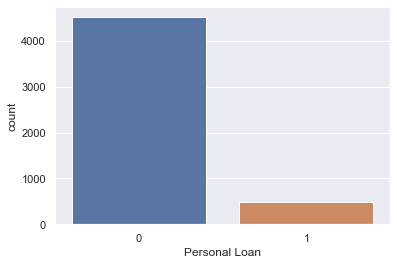

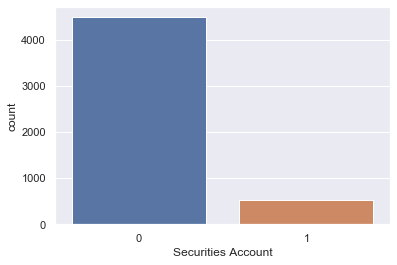

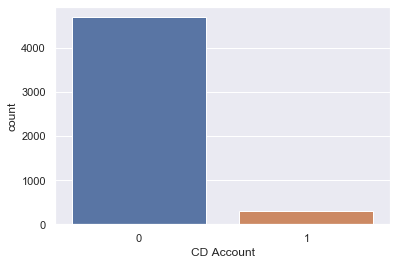

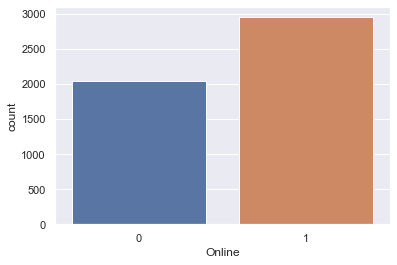

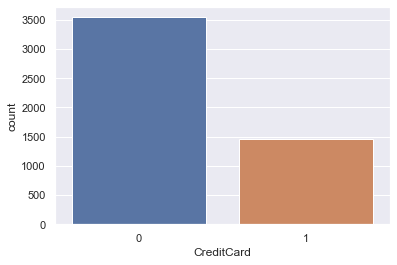

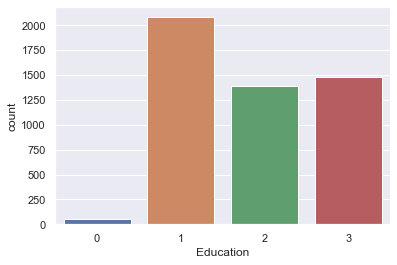

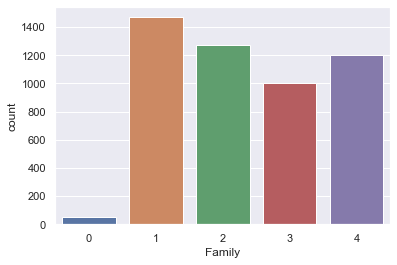

In [39]:
#Visualizing distributions of categorical variables in dataset
import warnings
warnings.filterwarnings('ignore')
for i in ['Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Education','Family']:
    sns.countplot(df[i])
    plt.show()

In [44]:
#We observe the counts of categorical variables
for i in ['Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Education','Family',
          'ZIP Code']:
    print(df[i].value_counts())

0    4520
1     480
Name: Personal Loan, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
0    4698
1     302
Name: CD Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64


In [45]:
#Most of the individuals in this dataset have only their bachelors degree
one = df.loc[df['Education'] == 1]['ID'].count()
print('Undergraduate Count:' + ' ' + str(one))
two = df.loc[df['Education'] == 2]['ID'].count()
print('Graduate Count:' + ' ' + str(two))
three = df.loc[df['Education'] == 3]['ID'].count()
print('Advanced/Professional Count:' + ' ' + str(three))

Undergraduate Count: 2096
Graduate Count: 1403
Advanced/Professional Count: 1501


In [13]:
#Most of the individuals in this dataset are single. There is a fair balance of the four categories nonetheless
one = df.loc[df['Family'] == 1]['ID'].count()
print('Family Size of 1:' + ' ' + str(one))
two = df.loc[df['Family'] == 2]['ID'].count()
print('Family Size of 2:' + ' ' + str(two))
three = df.loc[df['Family'] == 3]['ID'].count()
print('Family Size of 3:' + ' ' + str(three))
four = df.loc[df['Family'] == 4]['ID'].count()
print('Family Size of 4:' + ' ' + str(four))

Family Size of 1: 1472
Family Size of 2: 1296
Family Size of 3: 1010
Family Size of 4: 1222


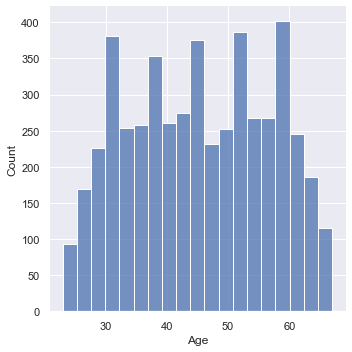

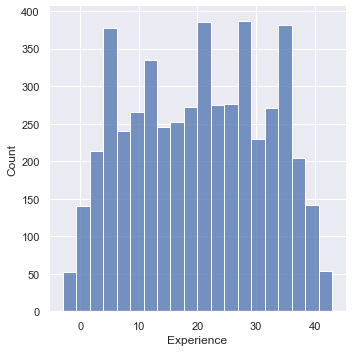

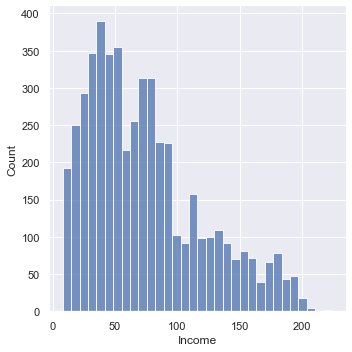

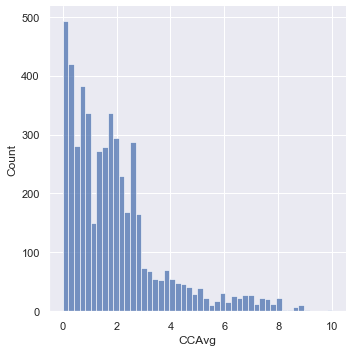

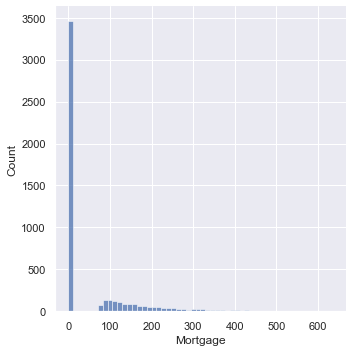

In [14]:
#Univariate plots for continuous variables
for i in ['Age', 'Experience', 
          'Income', 'CCAvg', 'Mortgage']:
    sns.displot(df, x=i)
    plt.show()

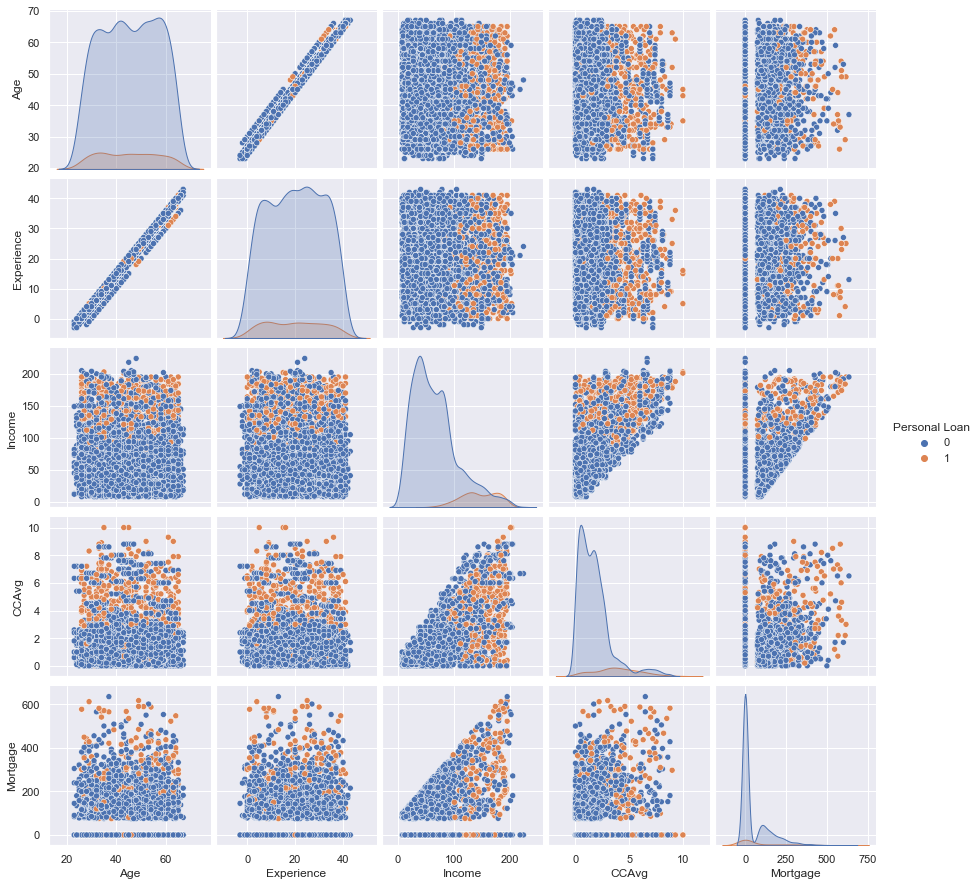

In [15]:
#Univariate and bivariate plots of continuous variables in dataset. It appears that
    #there are strong positive correlations between age and experience which makes sense
#We notice skewness in CCAvg, mortage, and income
df2 = df.copy()
df2["Personal Loan"] = df2["Personal Loan"].astype('category')
df2 = df2[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage','Personal Loan']]
sns.pairplot(df2, hue= 'Personal Loan')

# Logistic Regression Deployment

We observe proportion counts of the data we will feed in to the model first

In [16]:
for i in list(df.columns):   # checking value counts of all object type columns
    print(df[i].value_counts(normalize=True))
    print()

2047    0.0002
2608    0.0002
4647    0.0002
2600    0.0002
553     0.0002
         ...  
3263    0.0002
1218    0.0002
3267    0.0002
1222    0.0002
2049    0.0002
Name: ID, Length: 5000, dtype: float64

35    0.0302
43    0.0298
52    0.0290
58    0.0286
54    0.0286
50    0.0276
41    0.0272
30    0.0272
56    0.0270
34    0.0268
39    0.0266
59    0.0264
57    0.0264
51    0.0258
60    0.0254
45    0.0254
46    0.0254
42    0.0252
40    0.0250
31    0.0250
55    0.0250
62    0.0246
29    0.0246
61    0.0244
44    0.0242
32    0.0240
33    0.0240
48    0.0236
38    0.0230
49    0.0230
47    0.0226
53    0.0224
63    0.0216
36    0.0214
37    0.0212
28    0.0206
27    0.0182
65    0.0160
64    0.0156
26    0.0156
25    0.0106
24    0.0056
66    0.0048
23    0.0024
67    0.0024
Name: Age, dtype: float64

 32    0.0308
 20    0.0296
 9     0.0294
 5     0.0292
 23    0.0288
 35    0.0286
 25    0.0284
 28    0.0276
 18    0.0274
 19    0.0270
 26    0.0268
 24    0.0262
 3     0.0258
 

From the value counts above, it appears that there is a large imbalance of data in the 'Personal Loan' column, which we will be trying to predict. This may be a problem

In [17]:
#There seems to be 52 individuals with negative experience. This must be a flaw in the 
    #dataset as having negative years of experience is impossible
df[df['Experience'] < 0]['ID'].count()

52

In [18]:
df[df['Experience'] < 0] = 0

In [19]:
#We have filled these negative values with zeros and check to see if it worked, it did!
df[df['Experience'] < 0]['ID'].count()

0

We now build the model to predict the likelihood of a customer buying a personal loan

In [20]:
X = df.drop('Personal Loan', axis=1)
Y = df['Personal Loan'].astype('category')   
X = pd.get_dummies(X, columns = ['Education','Family','ZIP Code'])
X.head()

,ID,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,...,ZIP Code_95973,ZIP Code_96001,ZIP Code_96003,ZIP Code_96008,ZIP Code_96064,ZIP Code_96091,ZIP Code_96094,ZIP Code_96145,ZIP Code_96150,ZIP Code_96651
0,1,25,1,49,1.6,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,45,19,34,1.5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,39,15,11,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,35,9,100,2.7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,35,8,45,1.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

In [22]:
log_reg = LogisticRegression(random_state=7)
log_reg.fit(X_train, y_train)   

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_predict = log_reg.predict(X_test)

# Evaluation of Model

In [24]:
## Confusion matrix drawing
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
def draw_confusion_matrix(actual, predicted):
    matrix = confusion_matrix(actual, predicted)
    sns.heatmap(matrix, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

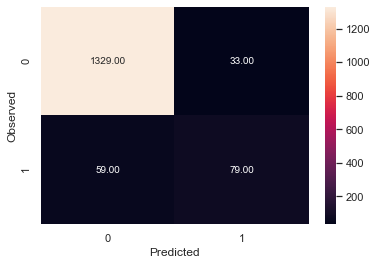

None


In [25]:
# From the confusion matrix, we notice that the number of true positives for
    #individuals who do not take the personal loan are very high
print(draw_confusion_matrix(y_test,y_predict))

In [26]:
print("Testing accuracy",log_reg.score(X_test, y_test))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

Testing accuracy 0.9386666666666666

Recall: 0.572463768115942

Precision: 0.7053571428571429

F1 Score: 0.632

Roc Auc Score: 0.7741173466130371


In [30]:
#Based on coefficient values, it seems Education_1, Education_3, Education_2, CCAvg, and CD Account are 
#the most important features in this dataset that influence this model's predictions
coeff = pd.DataFrame()
coeff['Column Name'] = X_train.columns
coeff['Coefficient'] = np.round(abs(log_reg.coef_[0]),2)
coeff.sort_values(by='Coefficient',ascending=False)

,Column Name,Coefficient
11,Education_1,1.21
13,Education_3,0.64
12,Education_2,0.51
4,CCAvg,0.46
7,CD Account,0.45
...,...,...
209,ZIP Code_92606,0.00
207,ZIP Code_92518,0.00
206,ZIP Code_92507,0.00
204,ZIP Code_92399,0.00


In [37]:
#Here, we can see the portion of data wrong predictions occurred by the logistic regression model
#There were 92 wrong predictions
wrong_preds = X_test.copy()
wrong_preds['Observed Loan Status'] = y_test
wrong_preds['Predicted Loan Status'] = y_predict
wrong_preds.loc[wrong_preds['Observed Loan Status'] != wrong_preds['Predicted Loan Status']]

,ID,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,...,ZIP Code_96003,ZIP Code_96008,ZIP Code_96064,ZIP Code_96091,ZIP Code_96094,ZIP Code_96145,ZIP Code_96150,ZIP Code_96651,Observed Loan Status,Predicted Loan Status
4301,4302,49,24,130,1.1,281,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
4575,4576,53,27,115,0.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1125,1126,37,13,172,6.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
78,79,54,30,133,2.6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3383,3384,46,22,135,4.1,213,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,1500,52,26,91,4.3,0,0,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1884,1885,57,33,163,7.4,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
927,928,65,40,95,3.7,138,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3084,3085,26,0,129,0.7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Business Insights

From the results above, I have found that logistic regression is indeed a good model of choice to predict the likelihood that a customer will take a loan or not. In this scenario, Thera bank wants predict which customers will take a loan and give money to these customers accordingly. Hence, we care primarily about the precision value since we want as many true positives as possible. These are cases where we predict a customer will take a loan and they in fact do. This way, the bank minimizes the loss of money on individuals who do not end up taking the loan. Our precision approximately 0.71, meaning that this is our true positive rate. This value is overall decent, meaning we can place a fair amount of trust in the model to classify individuals. From the coefficient values, it was also learned that education level, average spending on credit cards, and possessing a certificate of deposit is carries the most importance in regards to whether said individual will take the loan or not.